### 1.3.1 핵심 인물 찾기

In [2]:
users = [
    {'id':0, 'name':'Hero'},
    {'id':1, 'name':'Dunn'},
    {'id':2, 'name':'Sue'},
    {'id':3, 'name':'Chi'},
    {'id':4, 'name':'Thor'},
    {'id':5, 'name':'Clive'},
    {'id':6, 'name':'Hicks'},
    {'id':7, 'name':'Devin'},
    {'id':8, 'name':'Kate'},
    {'id':9, 'name':'Klein'},
]

friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [3]:
# 각 사용자의 friends 속성에 빈 list를 할당한다.
for user in users:
    user['friends'] = []

In [4]:
for i, j in friendships:
    # users[i]에서 i는 해당 사용자의 id를 나타내기 때문에 다음과 같이 추가할 수 있다.
    users[i]['friends'].append(users[j])  # j를 i의 친구로 추가
    users[j]['friends'].append(users[i])  # i를 j의 친구로 추가

In [5]:
def number_of_friends(user):
    '''user의 친구가 몇 명일까?'''
    return len(user['friends'])  # 각 friends list의 길이
total_connections = sum(number_of_friends(user) for user in users)  # 24

In [6]:
print(total_connections)

24


In [8]:
from __future__ import division  # 나눈 값이 정수로 나오면 쓸모가 없....
num_users = len(users)  # users list의 길이
avg_connections = total_connections / num_users  # 2.4

In [9]:
print(avg_connections)

2.4


In [19]:
# (user_id, number_of_friends)로 구성된 list 생성
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]

# 정렬해보쟈
# num_friends 기준으로 제일 큰 숫자부터 제일 작은 숫자 순으로 정렬
sorted(num_friends_by_id, key=lambda (user_id, num_friends): num_friends, reverse=True)  
 

SyntaxError: invalid syntax (<ipython-input-19-1c01deb2d7ef>, line 6)

### 1.3.2 데이터 과학자 추천하기

In [15]:
def friends_of_friend_ids_bad(user):
    # 'foaf'는 친구의 친구('friend of a frined')를 의미하는 약자이다.
    return [foaf['id']
           for friend in user['friends']  # user의 친구 개개인에 대해
           for foaf in friend['friends']]  # 그들의 친구들을 찾아준다

In [16]:
users[0]

{'id': 0,
 'name': 'Hero',
 'friends': [{'id': 1,
   'name': 'Dunn',
   'friends': [{...},
    {'id': 2,
     'name': 'Sue',
     'friends': [{...},
      {...},
      {'id': 3,
       'name': 'Chi',
       'friends': [{...},
        {...},
        {'id': 4,
         'name': 'Thor',
         'friends': [{...},
          {'id': 5,
           'name': 'Clive',
           'friends': [{...},
            {'id': 6,
             'name': 'Hicks',
             'friends': [{...},
              {'id': 8,
               'name': 'Kate',
               'friends': [{...},
                {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]},
                {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]},
            {'id': 7,
             'name': 'Devin',
             'friends': [{...},
              {'id': 8,
               'name': 'Kate',
               'friends': [{'id': 6,
                 'name': 'Hicks',
                 'friends': [{...}, {...}]},
                {...},
                {'id

In [25]:
print([friend['id'] for friend in users[0]['friends']])
print([friend['id'] for friend in users[1]['friends']])
print([friend['id'] for friend in users[2]['friends']])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [26]:
from collections import Counter

In [40]:
def not_the_same(user, other_user):
    '''만약 두 사용자의 id가 다르면 다른 사용자로 인식'''
    return user['id'] != other_user['id']

def not_friends(user, other_user):
    '''만약 other_user가 user['friend']에 포함되어 있지 않으면 친구가 아닌 것으로 간주함.;
    즉, other_user를 not_the_same 함수를 사용해서 user['friends']에 포함된 사람과 다르다고 인식'''
    return all(not_the_same(friend, other_user) for friend in user['friends'])

def friends_of_friend_ids(user):
    return Counter(foaf['id']
                  for friend in user['friends']  # 사용자의 친구 개개인에 대해
                  for foaf in friend['friends']  # 그들의 친구들을 세어보고
                  if not_the_same(user, foaf)  # 사용자 자신과
                  and not_friends(user, foaf))  # 사용자의 친구는 제외

In [44]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [45]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [46]:
def data_scientists_who_like(target_interest):
    return[user_id
          for user_id, usr_interest in interests
          if user_interest == target_interest]

In [47]:
from collections import defaultdict

# 각 관심사에 대한 사용자 인덱스 만들기
# key가 관심사, value가 사용자 id
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [48]:
# 각 사용자에 대한 관심사 인덱스 만들기
# key가 사용자 id, value가 관심사
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [49]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
                   for interest in interests_by_user_id[user_id]
                   for interested_user_id in user_ids_by_interest[interest]
                   if interested_user_id != user['id'])

### 1.3.3 연봉과 경력

In [50]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

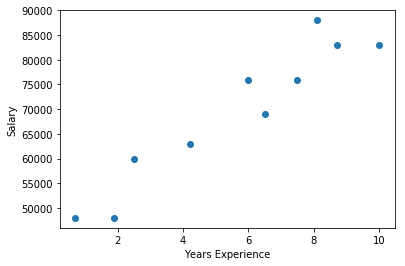

In [55]:
from matplotlib import pyplot as plt

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()
    
make_chart_salaries_by_tenure()

In [56]:
# key는 근속 연수, value는 해당 근속 연수에 대한 연봉 목록
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# key는 근속 연수, value는 해당 근속 연수의 평균 연봉
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
} 

In [58]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [59]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'

In [61]:
# key는 근속 연수 구간, value는 해당 구간에 속하는 사용자들의 연봉
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [64]:
# key는 근속 연수 구간, value는 해당 구간에 속하는 사용자들의 평균 연봉
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [65]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

### 1.3.4 유료 계정

In [66]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return 'paid'
    elif years_experience < 8.5:
        return 'unpaid'
    else:
        return 'paid'   

### 1.3.5 관심 주제

In [68]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())

In [70]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
